In [1]:
import math
def non(dataset):
    num = len(dataset)
    label = {}
    for data in dataset:
        cur = data[-1]# 结果标签
        if cur not in label.keys():
            label[cur] = 0
        label[cur] += 1
    nonent=0
    for key in label.keys():
        prob = float(label[key])/num
        nonent -= prob*math.log(prob,2)
    return nonent

In [53]:
def dataset():
    dataset = [[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataset,labels


In [118]:
mydat,labels = dataset()
non(mydat)

0.9709505944546686

In [6]:
mydat[0][-1] = 'maybe'
non(mydat)

1.3709505944546687

In [20]:
#按给定特征划分数据集
def splitdata(dataset,axis,value):
    ret = []
    for data in dataset:
        if data[axis]==value:
            reduceddata = data[:axis]
            reduceddata.extend(data[axis+1:])
            ret.append(reduceddata)
    return ret

In [21]:
splitdata(mydat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [ ]:
#很神奇的一个列表处理方式
def splitdata(dataset,axis,value):
    for data in dataset:
        if data[axis]==value:
            reduceddata = data[:axis]
            reduceddata.extend(data[axis+1:])
            dataset.append(reduceddata)
    return dataset

In [25]:
def cfeature(dataset):
    numf = len(dataset[0])-1# 最后一个元素是当前实例的类别标签
    baseentropy = non(dataset)
    bestgain = 0.0
    feature = -1
    for i in range(numf):
        featlist = [example[i] for example in dataset]
        va = set(featlist) # 提取特征
        newentropy = 0.0
        for value in va:
            subdata = splitdata(dataset,i,value)
            prob = len(subdata)/float(len(dataset))# 每个特征的value求概率
            newentropy += prob*non(subdata)
            infogain = baseentropy - newentropy
            if (infogain > bestgain): # 感觉这里代码有点冗余
                bestgain = infogain
                feature = i
    return feature
        
        
    

In [27]:
import operator
def majorcnt(classlist):
    count={}
    for vote in classlist:
        if vote not in count.keys():
            count[vote]=0
    sort = sorted(count.items(),key=operator.itemgetter(1),reverse=True)
    return sort
    

In [54]:
# 创建树的函数
def createtree(dataset,labels):
    classlist = [example[-1] for example in dataset]
    if classlist.count(classlist[0]) == len(classlist):
        return classlist[0]
    if len(dataset[0]) == 1:
        return majorcnt(classlist)
    feature = cfeature(dataset)
    print(feature)
    print(labels)
    featlabel = labels[feature]
    mytree = {featlabel:{}}
    del(labels[feature])
    value = [example[feature] for example in dataset]
    va = set(value)
    for val in va:
        sublabels = labels[:]
        mytree[featlabel][val] = createtree(splitdata(dataset,feature,val),sublabels)
    return mytree

In [70]:
mytree = createtree(mydat,labels)

0
['no surfacing', 'flippers']
0
['flippers']


In [90]:
#绘制树
import matplotlib.pyplot as plt

decision = dict(boxstyle='sawtooth',fc='0.8')# 描绘边框等的属性
leaf = dict(boxstyle='round4',fc='0.8')
arrow_args = dict(arrowstyle='<-')
def plotnode(txt,cpt,ppt,ntype):
    createPlot.ax1.annotate(txt,xy=ppt,xycoords='axes fraction',
                            xytext=cpt,textcoords='axes fraction',
                            va='center',ha='center',bbox=ntype,arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)#ax1相当于赋予一个属性
    plotnode('decision',(0.5,0.1),(0.1,0.5),decision)
    plotnode('leaf',(0.8,0.1),(0.3,0.8),leaf)
    plt.show()
    

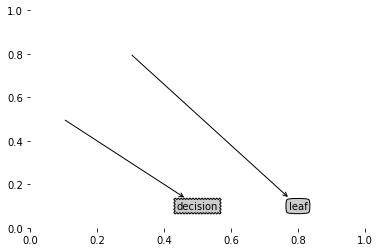

In [91]:
createPlot()

In [86]:
#获取叶节点的数目和树的层数
def getnum(mytree):
    num = 0
    first = list(mytree.keys())[0]
    seconddict = mytree[first]
    for key in seconddict.keys():
        if type(seconddict[key]).__name__=='dict':
            num += getnum(seconddict[key])
        else: num +=1
    return num
def getdepth(mytree):
    maxdepth = 0
    first = list(mytree.keys())[0]
    seconddict = mytree[first]
    for key in seconddict.keys():
        if type(seconddict[key]).__name__=='dict':
            thisdepth = 1 + getdepth(seconddict[key])
        else: thisdepth = 1
        if thisdepth > maxdepth: maxdepth = thisdepth
    return maxdepth

In [87]:
getdepth(mytree)

2

In [113]:
# plottree
def plottext(cpt,ppt,txt):
    xmid = (ppt[0]-cpt[0])/2.0 + cpt[0] #箭头上文字位置=子节点+1/2距离
    ymid = (ppt[1]-cpt[1])/2.0 + cpt[1]
    createPlot.ax1.text(xmid,ymid,txt)
def plottree(mytree,ppt,nodetxt):
    numl = getnum(mytree)
    numd = getdepth(mytree)
    first = list(mytree.keys())[0]
    cpt = (plottree.xOff + (1.0+float(numl))/2.0/plottree.totalW,plottree.yOff)
    plottext(cpt,ppt,nodetxt)
#     print(cpt)
#     print(ppt)
    plotnode(first,cpt,ppt,decision)
    seconddict = mytree[first]
    plottree.yOff = plottree.yOff-1.0/plottree.totalD
    for key in seconddict.keys():
        if type(seconddict[key]).__name__=='dict':
            plottree(seconddict[key],cpt,str(key))
        else:
            plottree.xOff = plottree.xOff+1.0/plottree.totalW
            plotnode(seconddict[key],(plottree.xOff,plottree.yOff),cpt,leaf)
            plottext((plottree.xOff,plottree.yOff),cpt,str(key))
    plottree.yOff = plottree.yOff + 1.0/plottree.totalD

def createPlot(intree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)#ax1相当于赋予一个属性
    plottree.totalW = float(getnum(intree))
    plottree.totalD = float(getdepth(intree))
    plottree.xOff = -0.5/plottree.totalW #初始化x
    plottree.yOff = 1.0
    plottree(intree,(0.5,1.0),'')
    plt.show()
    
    

(0.5, 1.0)
(0.5, 1.0)
(0.6666666666666666, 0.5)
(0.5, 1.0)


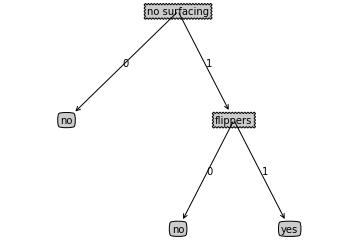

In [114]:
createPlot(mytree)

In [126]:
#分类函数
def classify(tree,labels,test):
    first = list(tree.keys())[0]#第一个特征
    seconddict = tree[first]#第二个字典
    index = labels.index(first)#第一个特征的索引
    for key in seconddict.keys():
        if test[index] == key:
            if type(seconddict[key]).__name__=='dict':
                classlabel = classify(seconddict[key],labels,test)
            else: classlabel = seconddict[key]
    return classlabel

In [128]:
classify(mytree,labels,[1,0])

'no'

In [131]:
#决策树的存储
import pickle
def storetree(tree,filename):
    with open(filename,'w') as fw:
        pickle.dump(tree,fw)
    
def grabtree(filename):
    with open(filename) as fr:
        return pickle.load(fr)

In [133]:
with open('/Users/enjlife/machine-learning/machinelearninginaction/ch03/lenses.txt') as fr:
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lenselabels = ['age','prescript','astigamtic','tearRate']
lensestree = createtree(lenses,lenselabels)
lensestree

3
['age', 'prescript', 'astigamtic', 'tearRate']
2
['age', 'prescript', 'astigamtic']
1
['age', 'prescript']
0
['age']
0
['age', 'prescript']
0
['prescript']


{'tearRate': {'normal': {'astigamtic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

(0.5, 1.0)
(0.5, 1.0)
(0.5555555555555556, 0.75)
(0.5, 1.0)
(0.33333333333333337, 0.5)
(0.5555555555555556, 0.75)
(0.38888888888888884, 0.25)
(0.33333333333333337, 0.5)
(0.7777777777777778, 0.5)
(0.5555555555555556, 0.75)
(0.6666666666666666, 0.25)
(0.7777777777777778, 0.5)


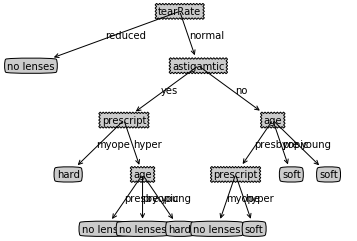

In [134]:
createPlot(lensestree)